<center><h1>Sign Language challenge </h1></center>

<center><h3>A data challenge on predicting the word from a performed video of the corresponding sign</h3></center>
<br/>
<center><i>Yanis Moudere, Matthieu Le Cossec, Abdellahi Elemine Vall, Samy Mdihi Thomas Flourent, Timothe Guillaume-Li</i></center>

# 1. Introduction

The WLASL is a dataset of videos of people performing American Sign Language (ASL) gestures for individual words. It's a valuable resource for researchers and developers working on sign language recognition and translation. With more than 2,000 unique signs and over 20,000 video clips, it provides a large and diverse set of training and testing data. The videos are captured in a variety of settings, including indoor and outdoor environments, with a range of lighting conditions, camera angles, and signers of different ages and genders.

# 2. setup

Install required packages

In [2]:
%load_ext autoreload
%autoreload 2
import sys
#!{sys.executable} -m pip install -r requirements.txt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Download the raw videos using the download_data.py

In [3]:
#!python data/download_data.py

After running this command you will have all the raw videos stored in the data/raw_videos file. note that since the videos are downloaded from the internet using links, some videos could be no more available on the same link as before so it's normal if some videos were skipped during the download.

# 3. The Dataset description

In the data folder, you will find the json file **WLASL_v0.3.json** that describes the dataset. This json file contains two objects for each word in the dataset. The first is the **gloss** which is the corresponding English word, and **instances** which is a list of dictionary objects that describe each video of that word. Each instance contains the information needed to download the video instance from the internet, but also the signer's ID and in which split (train or test) to put these instances. The splitting was done with the goal of balancing the training and test sets in terms of word frequencies, frame lengths, signers diversity, etc.

# 4. Data Exploration

### 4.1  Loading the data Json file

In [4]:
import matplotlib.pyplot as plt
import json

# Load the dataset from the JSON file
with open('data/WLASL_v0.3.json') as f:
    data = json.load(f)

In [5]:
import os
# Check for missing video files
count_missing = 0
video_dir = '/Users/mellek/Desktop/M2DS/datacamp/SignLanguage/data/raw_videos/'
for gloss in data:
    for sign in gloss['instances']:
        video_file = sign['video_id']
        if not os.path.exists(video_dir+video_file+'.mp4'):
            count_missing += 1
print('Missing {} videos'.format(count_missing))

Missing 21083 videos


### 4.2 Visualisation

First let's have a look at the histogram of the frequency distribution in the dataset

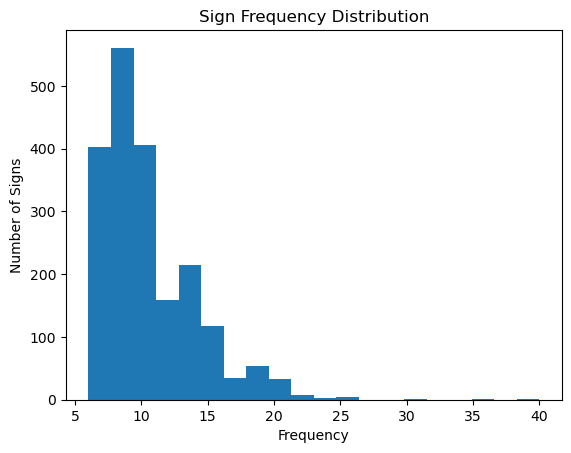

In [6]:
# Get the sign labels and frequencies
labels = [d['gloss'] for d in data]
frequencies = [len(d['instances']) for d in data]

# Plot the histogram
plt.hist(frequencies, bins=20)
plt.xlabel('Frequency')
plt.ylabel('Number of Signs')
plt.title('Sign Frequency Distribution')
plt.show()

Let's take a look at one of the videos, you can use the functions **get_video_path** and **read_video** and **plot_video_frames** from **problem.py**. The first function gives you the path of the first available video of a given word, and the second read the video frames in numpy array format, and the last one plot you images from that video. 

#

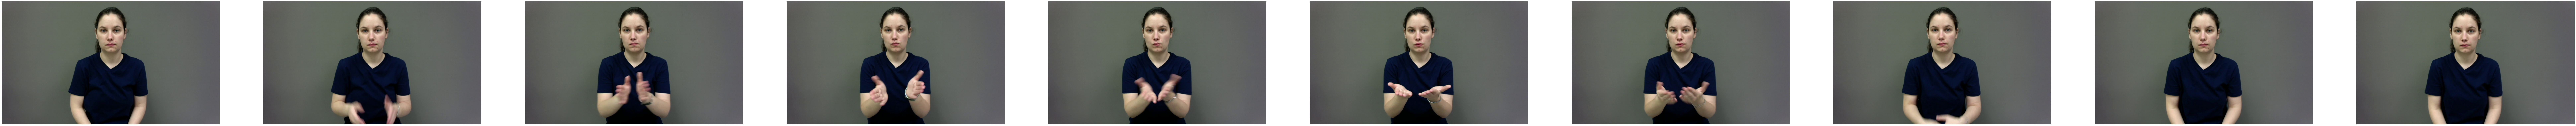

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from problem import read_video, get_video_path, plot_video_frames

# get the video path and read the video
word = 'book'
path_to_video = get_video_path(word, data)
video = read_video(path_to_video)

# plot the video frames
plot_video_frames(video)


In [8]:
# read the json file

import json
from sklearn.preprocessing import LabelEncoder
import pandas as pd
with open('data/WLASL_v0.3.json') as f:
    data = json.load(f)
    
# get the labels
for gloss in data:
    labels.append(gloss['gloss'])

# encode the labels

labels_encoded = LabelEncoder().fit_transform(labels)

# create a dictionary of labels and their encoded values

labels_dict = dict(zip(labels, labels_encoded))

# save the dictionary as a json file

import pickle 

with open('data/labels_dict.pkl', 'wb') as f:
    pickle.dump(labels_dict, f)

    

In [9]:
# create the dataset

from problem import get_train_data, get_test_data, WLSLDataset
import torch

In [14]:
# get the training data
paths, labels = get_train_data()

# crate the dataset
dataset = WLSLDataset(paths, labels, max_frames=100)

In [15]:
dataset.labels

array([ 210,  210,  210, ..., 1951, 1951, 1951])

In [16]:
# create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)


In [17]:
# iterate over the dataloader
for batch in dataloader:
    imgs, labels = batch
    print(imgs.shape)
    break

torch.Size([16, 100, 3, 224, 224])


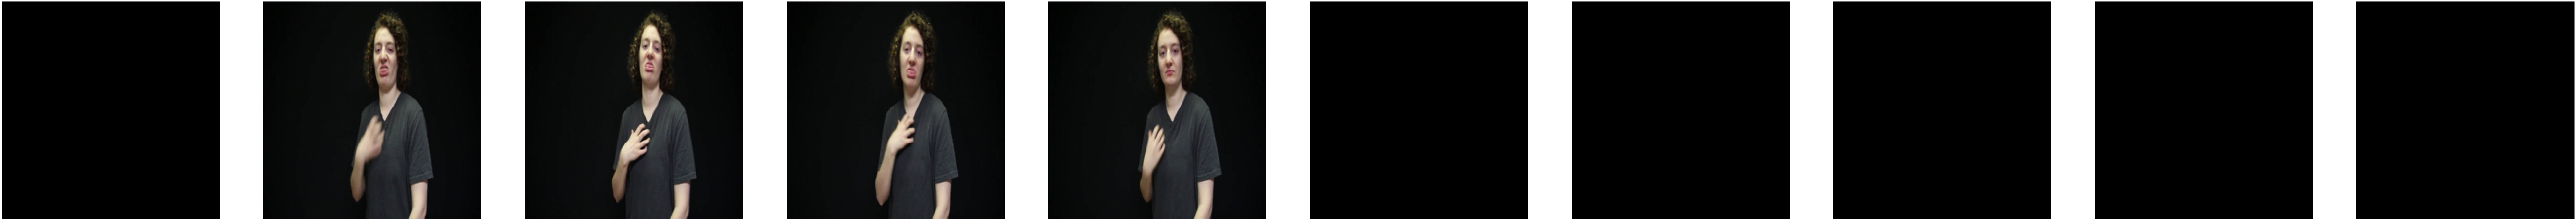

In [18]:
# plot a video
video = imgs[0].permute(0, 2, 3, 1).numpy()
plot_video_frames(video)

# 5. Submission

In [ ]:
from submissions.starting_kit.estimator import Classifier
from problem import get_train_data, get_test_data
model = Classifier()
X, y = get_train_data()
model = model.fit(X,y)

In [20]:
X, y = get_test_data()
X = X[:10]
y = y[:10]
probas = model.predict_proba(X)

In [21]:
predictions = model.predict(X).tolist()
predictions

[1712, 1716, 1716, 572, 1712, 1712, 1712, 51, 1670, 1712]

In [22]:
import pickle
# convert labels to words using the dictionary

# read the dictionary

dict = pickle.load(open('data/labels_dict.pkl', 'rb'))

# convert the labels to words
for i in range(len(predictions)):
    for key, value in dict.items():
        if value == predictions[i]:
            predictions[i] = key
            
predictions

['summer',
 'sunrise',
 'sunrise',
 'drum',
 'summer',
 'summer',
 'summer',
 'alligator',
 'stand',
 'summer']

In [9]:
y

['drink',
 'computer',
 'before',
 'before',
 'before',
 'go',
 'clothes',
 'who',
 'candy',
 'candy']